# **충남대학교 - 컴퓨터 그래픽스** 

학번 : 201702086

이름 : 한정경

## 과제 안내 사항 
딥러닝 과제는 따로 보고서를 받지 않을 예정입니다. 

대신 과제 구현 시 주석을 꼭 달아서 충분히 구현한 내용에 대한 설명을 해주시면 되겠습니다.

과제 제출 기한
12월 05일 월요일 23시 59분
제출 파일 : .ipynb 파일 


## **Pytorch 간단한 실습**
* ```nn.Sequential```을 활용한 layer 쌓기


In [1]:
import torch
from torch import nn

class My_model(nn.Module):
    def __init__(self):
        super().__init__()
        #         
        self.layer = nn.Sequential(
            nn.Conv2d(3,64,kernel_size=3,padding=1),
            nn.Conv2d(64,64,kernel_size=3,padding=1),
            nn.Conv2d(64,128,kernel_size=3,padding=1)
        )


    def forward(self, x):
        out = self.layer(x)

        return out


# model 정보 출력
model = My_model()
print(model)

My_model(
  (layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
)


## **과제** 
* ResNet 18 구현
* 사전 준비
  * kaggle API 연동


In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wjdrud2532","key":"064e2ace5062b294cf498a3e5cd1fc90"}'}

In [4]:
!ls -1ha kaggle.json

kaggle.json


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                             deadline             category            reward  teamCount  userHasEntered  
----------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                    2030-07-01 23:59:00  Getting Started     Prizes         61           False  
gan-getting-started                             2030-07-01 23:59:00  Getting Started     Prizes         91           False  
store-sales-time-series-forecasting             2030-06-30 23:59:00  Getting Started  Knowledge        712           False  
tpu-getting-started                             2030-06-03 23:59:00  Getting Started  Knowledge        137           False  
digit-recognizer                                2030-01-01 00:00:00  Getting Started  Knowledge       1238           False  
titanic                                         2030-01-01 00:00:00  Getting Started  Knowledge      13974           False  


In [6]:
!kaggle datasets download -d mahmoudreda55/satellite-image-classification

 92% 20.0M/21.8M [00:02<00:00, 15.2MB/s]
100% 21.8M/21.8M [00:02<00:00, 7.77MB/s]


In [7]:
!unzip ./satellite-image-classification.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: data/cloudy/train_23566.jpg  
  inflating: data/cloudy/train_23598.jpg  
  inflating: data/cloudy/train_23608.jpg  
  inflating: data/cloudy/train_23634.jpg  
  inflating: data/cloudy/train_23636.jpg  
  inflating: data/cloudy/train_23646.jpg  
  inflating: data/cloudy/train_2366.jpg  
  inflating: data/cloudy/train_23664.jpg  
  inflating: data/cloudy/train_23706.jpg  
  inflating: data/cloudy/train_2380.jpg  
  inflating: data/cloudy/train_23805.jpg  
  inflating: data/cloudy/train_23806.jpg  
  inflating: data/cloudy/train_23826.jpg  
  inflating: data/cloudy/train_23843.jpg  
  inflating: data/cloudy/train_23877.jpg  
  inflating: data/cloudy/train_23884.jpg  
  inflating: data/cloudy/train_23953.jpg  
  inflating: data/cloudy/train_2396.jpg  
  inflating: data/cloudy/train_23978.jpg  
  inflating: data/cloudy/train_23979.jpg  
  inflating: data/cloudy/train_23980.jpg  
  inflating: data/cloudy/train_23981.jpg  
  inflating: data/clo

In [8]:
## Custom DataSet Loader
import torch
from torch.utils.data import Dataset
import numpy as np
import os
import cv2
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split

In [9]:
# function collection and variable

def get_labels(data_path):
  return os.listdir(data_path)

def check_image_count(label, data_path):
  print("{} count : {}".format(label,len(os.listdir(data_path))))

image_size = (224,224)

In [10]:
DATA_FOLDER = 'data'

label_mapper = {}


# check data code
def check_data(data_path):
    labels = os.listdir(data_path)
    for label in labels:
        folder_path = os.path.join(data_path, label)
        check_image_count(label,folder_path)

check_data(DATA_FOLDER)
    
def make_excel_data(data_path):
    image_data = []
    labels = os.listdir(data_path)
    for index, label in enumerate(labels):
        folder_path = os.path.join(data_path, label)
        image_list = os.listdir(folder_path)
        label_mapper[label] = index
        for image in tqdm(image_list):
            data_row = []
            image_path = os.path.join(folder_path, image)
            image_shape = cv2.imread(image_path).shape
            data_row.append(image_path)
            data_row.append(label)
            image_data.append(data_row)
    return image_data
          
image_data = make_excel_data(DATA_FOLDER)

water count : 1500
cloudy count : 1500
desert count : 1131
green_area count : 1500


100%|██████████| 1500/1500 [00:00<00:00, 4545.34it/s]


In [11]:
label_mapper

{'water': 0, 'cloudy': 1, 'desert': 2, 'green_area': 3}

In [12]:
def generate_csv(image_data):
    columns = ['path', 'label']
    # 총 데이터 개수 : 5613
    image_data = np.array(image_data)
    print(image_data.shape)
    # 데이터를 train set과 test set으로 구분 비율 8 : 2
    train_dataset, test_dataset = train_test_split(image_data, test_size=0.2, random_state= 42)
    # train data : 4504 test : 1127 (4504 + 1127 = 5631)
    print(train_dataset.shape, test_dataset.shape)
    df = pd.DataFrame(train_dataset, columns= columns)
    df.to_csv('train.csv')
    df2 = pd.DataFrame(test_dataset, columns= columns)
    df2.to_csv('test.csv')
generate_csv(image_data)

(5631, 2)
(4504, 2) (1127, 2)


In [13]:
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file,names=['path', 'label'],header=1)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        
        img_path = self.img_labels.iloc[idx, 0]
        image = cv2.imread(img_path)
        label = self.img_labels.iloc[idx, 1]
        if label == 'label':
            return None, None
        label = label_mapper[label]
        
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        return image, label

In [14]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor()])

# train data 
# batch size는 하이퍼 파라미터이므로 자유롭게 설정 

dataset = CustomImageDataset('train.csv',transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# test data
# batch size는 1로 설정 
testdataset = CustomImageDataset('test.csv',transform)
testdataloader = DataLoader(testdataset, batch_size=1, shuffle=True)

In [15]:
# 훈련 및 테스트 배치 개수
print("train : {}".format(len(dataloader)))
print("train : {}".format(len(dataloader))) 
print("test : {}".format(len(testdataset)))
print("test : {}".format(len(testdataloader)))

train : 563
train : 563
test : 1126
test : 1126


Feature batch shape: torch.Size([8, 3, 224, 224])
Labels batch shape: torch.Size([8])
torch.Size([3, 224, 224])
tensor(2)


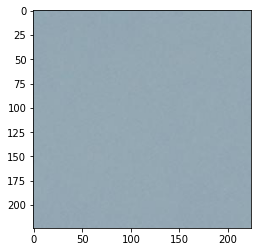

Label: 2


In [16]:
import matplotlib.pyplot as plt
train_features, train_labels = next(iter(dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
print(img.shape)
label = train_labels[0]
print(label)
plt.imshow(img.permute(1, 2, 0))
plt.show()
print(f"Label: {label}")

## **과제 유의 사항** 
* ```nn.BatchNorm2d```을 ```BasicBlock```에서 사용 할 것(아래 pytorch 내장 모듈의 구조 참고)
* 사용법 -  https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html?highlight=batchnorm2d#torch.nn.BatchNorm2d 
* skip connection은 ```BasicBlock``` 단위로 수행 - PPT 설명 참고
* **최종 Test data에서 70% 이상 정확도 달성이 목표 못하면 감점**


In [17]:
# Pytorch res18 모델 아키텍쳐 구성 참고 
import torchvision
torch_res18 = torchvision.models.resnet18()

In [18]:
#torch_res18

In [155]:
import torch.nn as nn
import torch.nn.functional as F

class BasicBlock(nn.Module):

    def __init__(self, input_channel, output_channel, stride=1 , downsample=False):
        super(BasicBlock, self).__init__()

        #######################################
        # Todo BasicBlock __init__구현 구현
        #######################################

        #cnn 2개 사용 
        #                                                                                             BatchNorm2d에 bias가 포함되어 있으므로 false로 설정
        self.conv1 = nn.Conv2d(input_channel, output_channel, kernel_size=3, padding=1, stride=stride, bias=False)
        self.bn1 = nn.BatchNorm2d(output_channel)   #학습 안정화를 위한 배치 정규화, 학습률을 높게 잡는 경우를 예방

        #self.relu = nn.ReLU(inplace=True)

        #                                                                                여기는 왜 스트라이트 설정을 1로 고정하는지
        self.conv2 = nn.Conv2d(output_channel, output_channel, kernel_size=3, padding=1, bias=False) 
        self.bn2 = nn.BatchNorm2d(output_channel)   #학습 안정화를 위한 배치 정규화

        #쓰면 정확도 1% 감소
        #self.relu = nn.ReLU()

        #여러 모듈을 하나로 묶음 
        self.shortcut = nn.Sequential()
        
        # 만약 size가 안맞아 합연산이 불가하다면, 연산 가능하도록 모양을 맞춰줌
        # ex) stride가 1이 아닌 경우, 이전의 input feature와 달라질 경우 작동
        if stride != 1: # x와 
            self.shortcut = nn.Sequential(
                nn.Conv2d(input_channel, output_channel, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(output_channel)
            )
    
    def forward(self, x):

        ####################################################
        # Todo Basic block forward 구현
        # 주의 사항
        # skip connection은 Basic Block 단위로 구현
        # 즉 Basic Block의 입력 값과 최종 결과 값을 더한다
        # 만약 입력 값과 결과 값의 크기가 다르면 
        # __init__ 함수의 self.shrotcut을 활용한다. -> 크기가 다른 경우 등, 차이를 학습, 전체가 아닌 일부만 학습하기 때문에 더 빠름
        ###################################################

        out = self.conv1(x)
        out = self.bn1(out)
        out = F.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        
        #shortcut이 필요한 경우, output에 추가로 더하여 사용할 수 있도록 정의되어 있음
        #만약 입력 값과 결과 값의 크기가 다르면 
        # __init__ 함수의 self.shrotcut을 활용한다 -> strude가 1이 아닌 경우, input feature와 달라질 경우 
        #           shortcut는 비어 있는 모듈이 되어 += 해도 상관없다 -> if문 사용하지 않음
        out += self.shortcut(x)

        out = F.relu(out)
            
        return out

In [172]:
class My_ResNet18(nn.Module):
  
    def __init__(self, block, num_classes=4, layer_channels = [64, 128, 256, 512], layer_strides = [1,2,2,2]):
        super(My_ResNet18, self).__init__()

        # layer 1 ~ layer 4까지 
        self.layer_channels = [64, 128, 256, 512]
        self.layer_strides = [1,2,2,2]

        #RGB 3개채널에서 64개의 Kernel 사용 (논문 참고)
        self.input_channel = 64
        
        #논문 그대로 구현한 코드 참조

        #입력으로 RGB를 사용하기 때문에 첫 입력 채널크기는 3으로 설정
        self.conv1 = nn.Conv2d(3, self.input_channel, kernel_size=7, padding=3, stride=2, bias=False)
        self.bn1 = nn.BatchNorm2d(self.input_channel)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        #                                   채널 개수에 맞게 설정
        #                                                     test 비교를 위해 2로 설정
        #                                                           레이어에 맞는 strides 사용
        # 각 층마다 block의 설정값 변함
        # 크기는 64 -> 128 -> 256 -> 512로 
        self.layer1 = self.make_layer(block, layer_channels[0], 2, layer_strides[0])
        self.layer2 = self.make_layer(block, layer_channels[1], 2, layer_strides[1])
        self.layer3 = self.make_layer(block, layer_channels[2], 2, layer_strides[2])
        self.layer4 = self.make_layer(block, layer_channels[3], 2, layer_strides[3])
        
        # output size : 1 x 1 
        # 여러 평면으로 구성된 입력신호에 대해 2D평균 풀링을 적용하여 output size를 1 x 1로 설정
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        
        #모든 layer를 선형으로 연결  
        self.linear = nn.Linear(512, num_classes)


    #한 층에 생성된 여러 Basicblock 를 Sequential로 묶어줌 (test에서 2개의 block로 측정하므로 2개를 1개로 묶음)
    def make_layer(self, block, out_planes, num_block, stride):
        #                                   num_block : 생성될 블럭 수 (layer 반복해서 쌓는 개수)
        strides = [stride] + [1] * (num_block-1)
        layers = []
        for i in range(num_block):
          # 블록 시작 layer에 대해 downsampling 이 필요하므로 true로 설정
            layers.append(block(self.input_channel, out_planes, strides[i], downsample=True))
            self.input_channel = out_planes
        return nn.Sequential(*layers)


    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = F.relu(out)
        out = self.maxpool1(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avgpool(out)
        out = torch.flatten(out,1)
        out = self.linear(out)
        return out

In [173]:
# model 아키텍쳐 정보 확인
model = My_ResNet18(BasicBlock)
#print(model)

In [174]:
import torch.optim as optim

In [178]:
# gpu 사용 유무 확인
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
model = model.to(device)
# 손실함수 선언
criterion = nn.CrossEntropyLoss()
# 옵티마이저 선언
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 에포크는 자유롭게 설정
for epoch in range(10):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for iter, data in enumerate(dataloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        
        inputs, labels = data[0].to(device), data[1].to(device)
        if labels == None:
            continue
        # # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if iter % 100 == 0:    # 100 iteration 마다 loss 출력 
            print(f'[{epoch + 1}, {iter + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

cuda
[1,     1] loss: 0.002
[1,   101] loss: 0.728
[1,   201] loss: 0.569
[1,   301] loss: 0.602
[1,   401] loss: 0.514
[1,   501] loss: 0.428
[2,     1] loss: 0.010
[2,   101] loss: 0.401
[2,   201] loss: 0.494
[2,   301] loss: 0.363
[2,   401] loss: 0.474
[2,   501] loss: 0.358
[3,     1] loss: 0.003
[3,   101] loss: 0.401
[3,   201] loss: 0.400
[3,   301] loss: 0.364
[3,   401] loss: 0.373
[3,   501] loss: 0.326
[4,     1] loss: 0.006
[4,   101] loss: 0.361
[4,   201] loss: 0.401
[4,   301] loss: 0.332
[4,   401] loss: 0.359
[4,   501] loss: 0.359
[5,     1] loss: 0.001
[5,   101] loss: 0.370
[5,   201] loss: 0.404
[5,   301] loss: 0.339
[5,   401] loss: 0.265
[5,   501] loss: 0.302
[6,     1] loss: 0.004
[6,   101] loss: 0.279
[6,   201] loss: 0.327
[6,   301] loss: 0.282
[6,   401] loss: 0.263
[6,   501] loss: 0.277
[7,     1] loss: 0.006
[7,   101] loss: 0.249
[7,   201] loss: 0.325
[7,   301] loss: 0.287
[7,   401] loss: 0.245
[7,   501] loss: 0.242
[8,     1] loss: 0.003
[8,   

In [179]:
# 훈련이 끝난 모델의 파라미터 저장
PATH = './my_res18.pth'
torch.save(model.state_dict(), PATH)

In [180]:
# 새로운 모델 객체를 만들고 저장했던 가중치를 불러옴
######################################################################################
#My_ResNet18 의 make_layer에 [2,2,2,2]로 설정해두었기 때문에 파라미터 삭제함
######################################################################################
new_model =  My_ResNet18(BasicBlock)
new_model.load_state_dict(torch.load(PATH))

# Test 데이터로 모델 정확도 평가 
correct = 0
total = 0
model.to(device)
model.eval()
with torch.no_grad():
    for data in testdataloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

#70% 이상이 목표
#예시로 나와있던 것 75%
#epoch 10으로 설정
#Block 에서 Relu 쓰면 87%
#안쓰면 90% 나옴
#몇번 돌려보니까 78%에서 오락가락함

Accuracy of the network on the test images: 90 %
